# EV_charging Pattern

### The dataset contains 1,320 EV charging sessions, detailing user ID, vehicle model, battery capacity, charging times, energy consumed, cost, and contextual factors like time, location, temperature, and user type. From this dataset help to analyis the efficiency of vehicle and the battery capacity their charging duration to understand amoung these models which one give better throughput

### importing all the modules and calling the csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=1000
df=pd.read_csv(r"E:\Datascience\Data set\ev_charging_patterns.csv")




### Printing first 20 rows


In [3]:
print(df.head(20))

    User ID  Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0    User_1         BMW i3              108.463007         Station_391   
1    User_2   Hyundai Kona              100.000000         Station_428   
2    User_3     Chevy Bolt               75.000000         Station_181   
3    User_4   Hyundai Kona               50.000000         Station_327   
4    User_5   Hyundai Kona               50.000000         Station_108   
5    User_6    Nissan Leaf               50.000000         Station_335   
6    User_7     Chevy Bolt               85.000000         Station_162   
7    User_8     Chevy Bolt               75.000000         Station_302   
8    User_9     Chevy Bolt               62.000000         Station_493   
9   User_10   Hyundai Kona               50.000000         Station_452   
10  User_11         BMW i3               50.000000         Station_206   
11  User_12     Chevy Bolt               85.000000          Station_78   
12  User_13   Hyundai Kona            

### printing last 20 rows


In [4]:
print(df.tail(20))

        User ID  Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
1300  User_1301   Hyundai Kona               62.000000         Station_216   
1301  User_1302    Nissan Leaf               85.000000          Station_69   
1302  User_1303     Chevy Bolt               60.803164          Station_84   
1303  User_1304   Hyundai Kona               81.062030         Station_103   
1304  User_1305     Chevy Bolt               46.172873          Station_39   
1305  User_1306    Nissan Leaf               50.000000          Station_13   
1306  User_1307         BMW i3               75.000000         Station_297   
1307  User_1308  Tesla Model 3               85.000000         Station_313   
1308  User_1309         BMW i3               75.000000         Station_181   
1309  User_1310   Hyundai Kona               50.000000         Station_493   
1310  User_1311  Tesla Model 3               62.000000         Station_268   
1311  User_1312   Hyundai Kona               50.000000          

### replacing white space in the column by underscore and performing various cleaning process like converting datetime to datetime format,filling null value with numerical and categorical value and checking for any duplicates if it found deleting them(cleaning data)

In [5]:
df = pd.read_csv(r"E:\\Datascience\\Data set\\ev_charging_patterns.csv")
df.columns = [col.replace(" ", "_") for col in df.columns]
df.dropna(inplace=True)
df['Charging_Start_Time'] = pd.to_datetime(df['Charging_Start_Time'])
df['Charging_End_Time'] = pd.to_datetime(df['Charging_End_Time'])

numeric_column = 'numeric_column'
if numeric_column in df.columns:
    df[numeric_column].fillna(df[numeric_column].mean(), inplace=True)
categorical_column = 'categorical_column'
if categorical_column in df.columns:
    df[categorical_column].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)
df.isna().sum()
df.info()

(1131, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 1131 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   User_ID                                   1131 non-null   object        
 1   Vehicle_Model                             1131 non-null   object        
 2   Battery_Capacity_(kWh)                    1131 non-null   float64       
 3   Charging_Station_ID                       1131 non-null   object        
 4   Charging_Station_Location                 1131 non-null   object        
 5   Charging_Start_Time                       1131 non-null   datetime64[ns]
 6   Charging_End_Time                         1131 non-null   datetime64[ns]
 7   Energy_Consumed_(kWh)                     1131 non-null   float64       
 8   Charging_Duration_(hours)                 1131 non-null   float64       
 9   Charging_Rate_(kW)      

### Checking for any duplicates

In [6]:
print(df.duplicated().sum())

0


# statistical analysis

       Battery_Capacity_(kWh)  Energy_Consumed_(kWh)  \
count             1131.000000            1131.000000   
mean                74.427818              42.915668   
std                 20.828350              22.201286   
min                  1.536540               0.045772   
25%                 62.000000              24.248936   
50%                 75.000000              42.865611   
75%                 85.000000              61.544055   
max                193.003074             152.238758   

       Charging_Duration_(hours)  Charging_Rate_(kW)  Charging_Cost_(USD)  \
count                1131.000000         1131.000000          1131.000000   
mean                    2.303177           26.014166            22.488351   
std                     1.065878           14.010292            10.792504   
min                     0.095314            1.472549             0.307085   
25%                     1.425281           13.949809            13.133925   
50%                     2.312675 

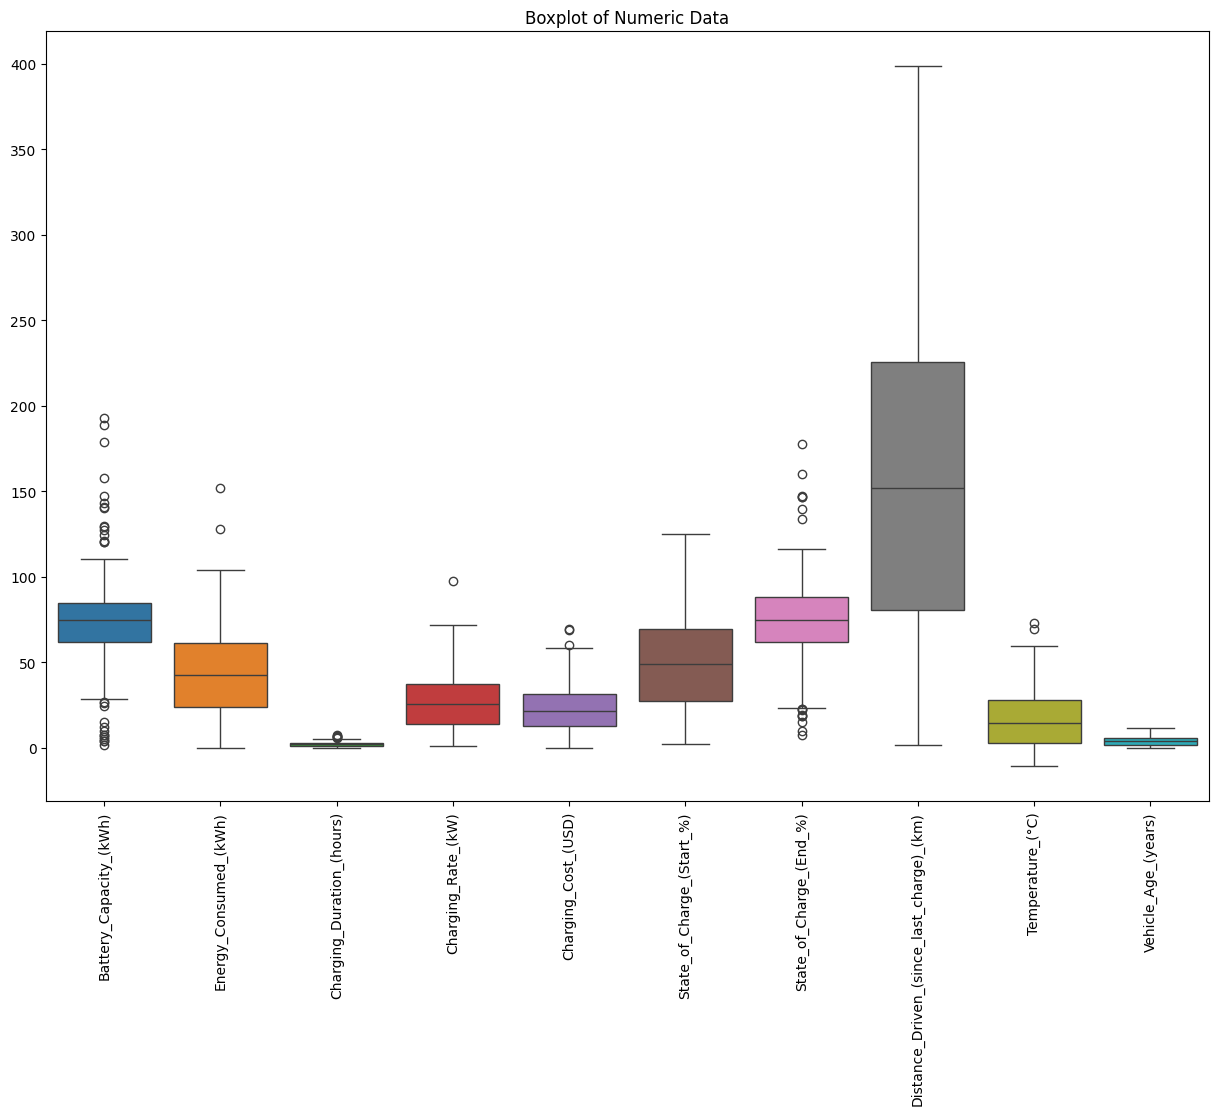

In [7]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
stat_an=numeric_data.describe()
print(stat_an)
print(df.head(20))
print(df.tail())
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title('Boxplot of Numeric Data')
plt.xticks(rotation=90)  
plt.show()


### performing correlation

                                          Battery_Capacity_(kWh)  \
Battery_Capacity_(kWh)                                  1.000000   
Energy_Consumed_(kWh)                                   0.018250   
Charging_Duration_(hours)                              -0.022889   
Charging_Rate_(kW)                                     -0.002652   
Charging_Cost_(USD)                                    -0.008475   
State_of_Charge_(Start_%)                              -0.071613   
State_of_Charge_(End_%)                                 0.006081   
Distance_Driven_(since_last_charge)_(km)               -0.047859   
Temperature_(°C)                                       -0.021892   
Vehicle_Age_(years)                                     0.050036   

                                          Energy_Consumed_(kWh)  \
Battery_Capacity_(kWh)                                 0.018250   
Energy_Consumed_(kWh)                                  1.000000   
Charging_Duration_(hours)                         

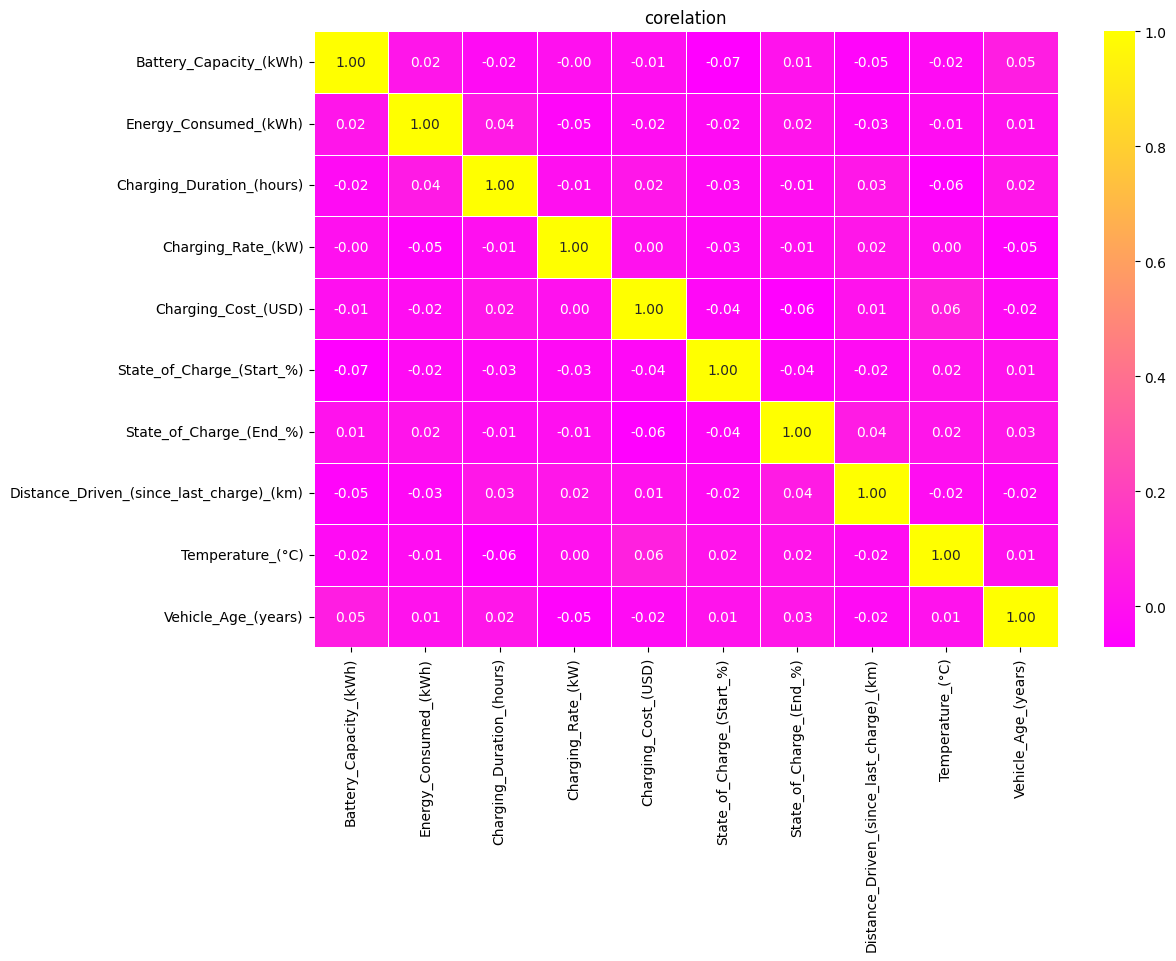

In [8]:
corelation=numeric_data.corr()
print(corelation)
plt.figure(figsize=(12,8))
sns.heatmap(corelation,cmap='spring',annot=True,fmt='.2f',linewidths=0.5)
plt.title("corelation")
plt.show()


### performing covarience

                                          Battery_Capacity_(kWh)  \
Battery_Capacity_(kWh)                                433.820153   
Energy_Consumed_(kWh)                                   8.439302   
Charging_Duration_(hours)                              -0.508150   
Charging_Rate_(kW)                                     -0.773743   
Charging_Cost_(USD)                                    -1.905042   
State_of_Charge_(Start_%)                             -36.052218   
State_of_Charge_(End_%)                                 2.143227   
Distance_Driven_(since_last_charge)_(km)              -85.278233   
Temperature_(°C)                                       -6.726144   
Vehicle_Age_(years)                                     2.422111   

                                          Energy_Consumed_(kWh)  \
Battery_Capacity_(kWh)                                 8.439302   
Energy_Consumed_(kWh)                                492.897104   
Charging_Duration_(hours)                         

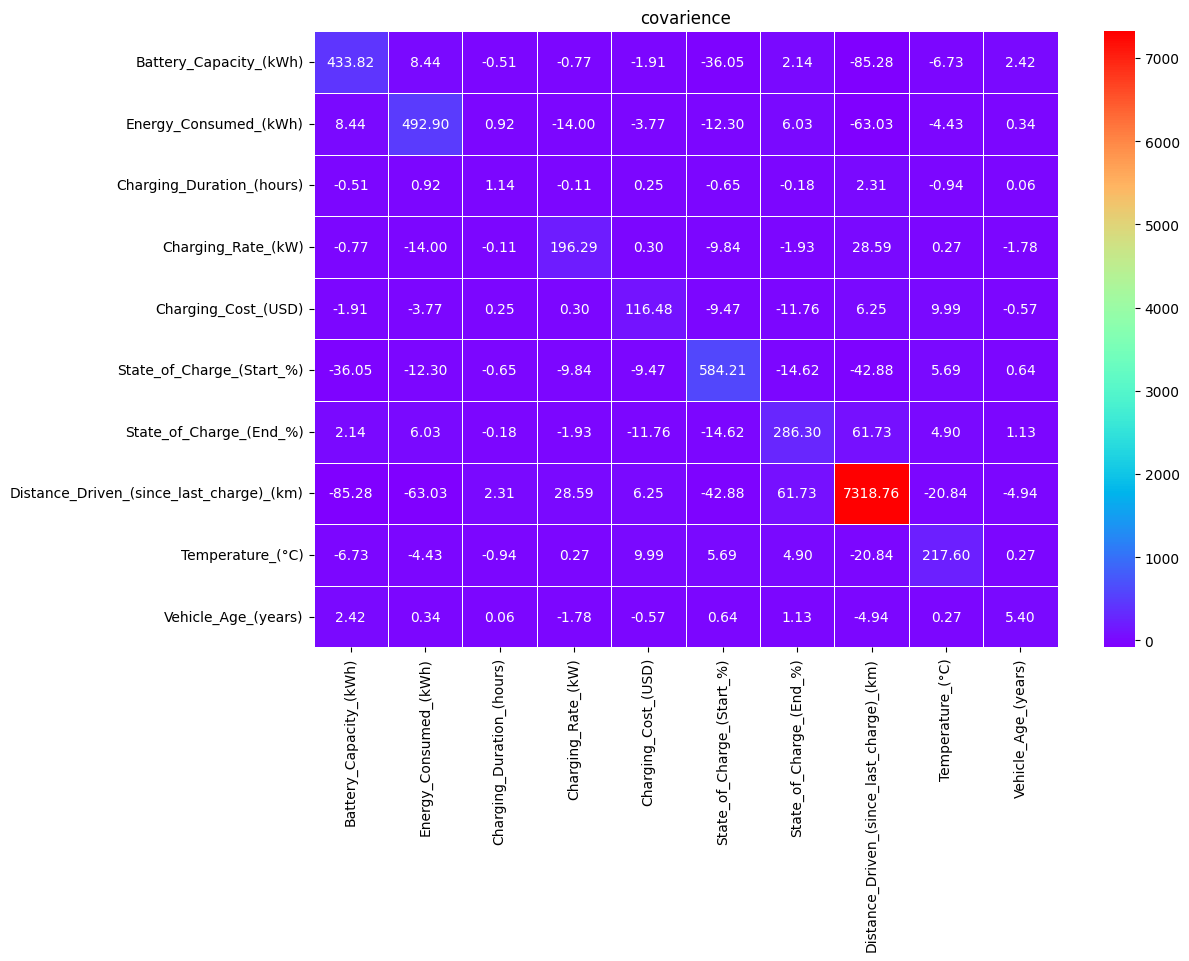

In [9]:
covarience=numeric_data.cov()
print(covarience)
plt.figure(figsize=(12,8))
sns.heatmap(covarience,cmap='rainbow',annot=True,fmt='.2f',linewidths=0.5)
plt.title("covarience")
plt.show()

### varoius questions regarding the dataset after the cleaning and statistical analysis

### 1.What is the average battery capacity for each vehicle model?

average battery capacity is :  Vehicle_Model
BMW i3           77.272168
Chevy Bolt       73.218175
Hyundai Kona     75.547597
Nissan Leaf      72.758220
Tesla Model 3    73.466790
Name: Battery_Capacity_(kWh), dtype: float64


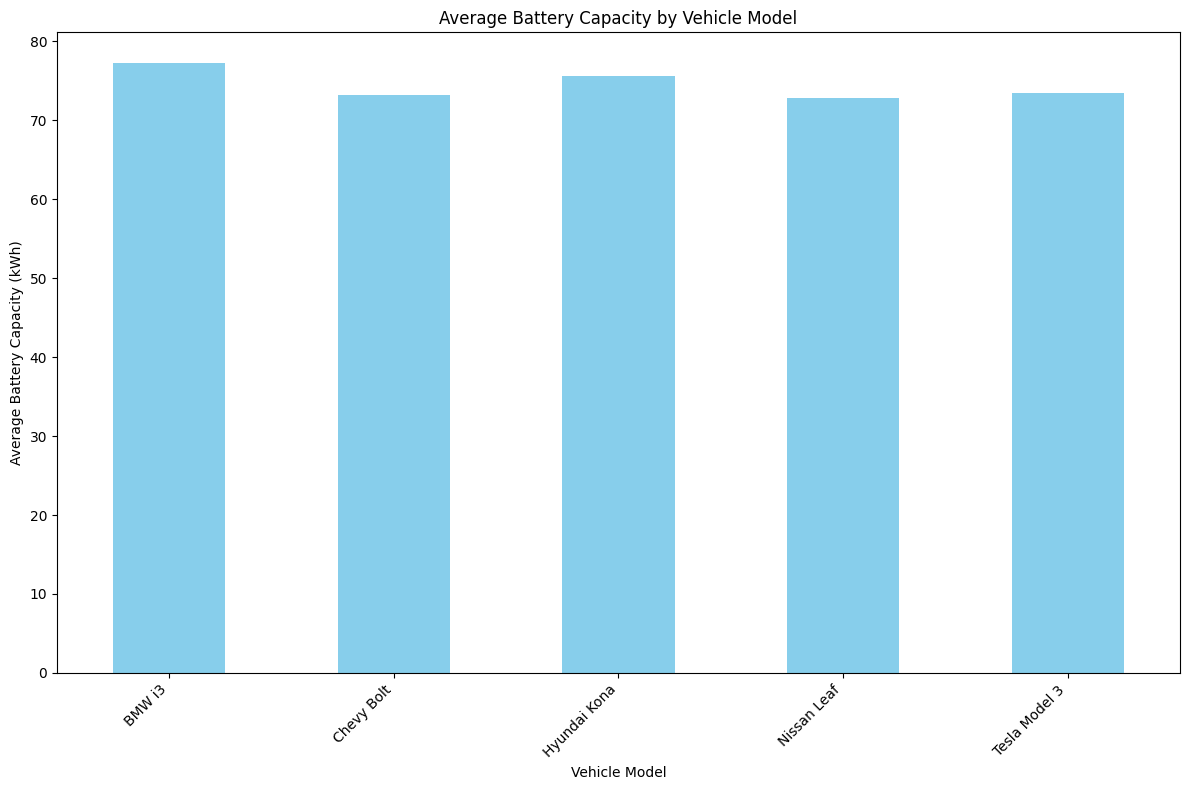

In [10]:

if 'Vehicle_Model' in df.columns and 'Battery_Capacity_(kWh)' in df.columns:
    avg_capacity=df.groupby('Vehicle_Model')['Battery_Capacity_(kWh)'].mean()
    print("average battery capacity is : ",avg_capacity)
    plt.figure(figsize=(12, 8))
    avg_capacity.plot(kind='bar', color='skyblue')
    plt.title('Average Battery Capacity by Vehicle Model')
    plt.xlabel('Vehicle Model')
    plt.ylabel('Average Battery Capacity (kWh)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()

### 2.How does the average energy consumed per charging session vary by vehicle model?

average wnergy consumed is :  Vehicle_Model
BMW i3           42.664296
Chevy Bolt       41.456222
Hyundai Kona     42.923506
Nissan Leaf      42.674726
Tesla Model 3    44.672471
Name: Energy_Consumed_(kWh), dtype: float64


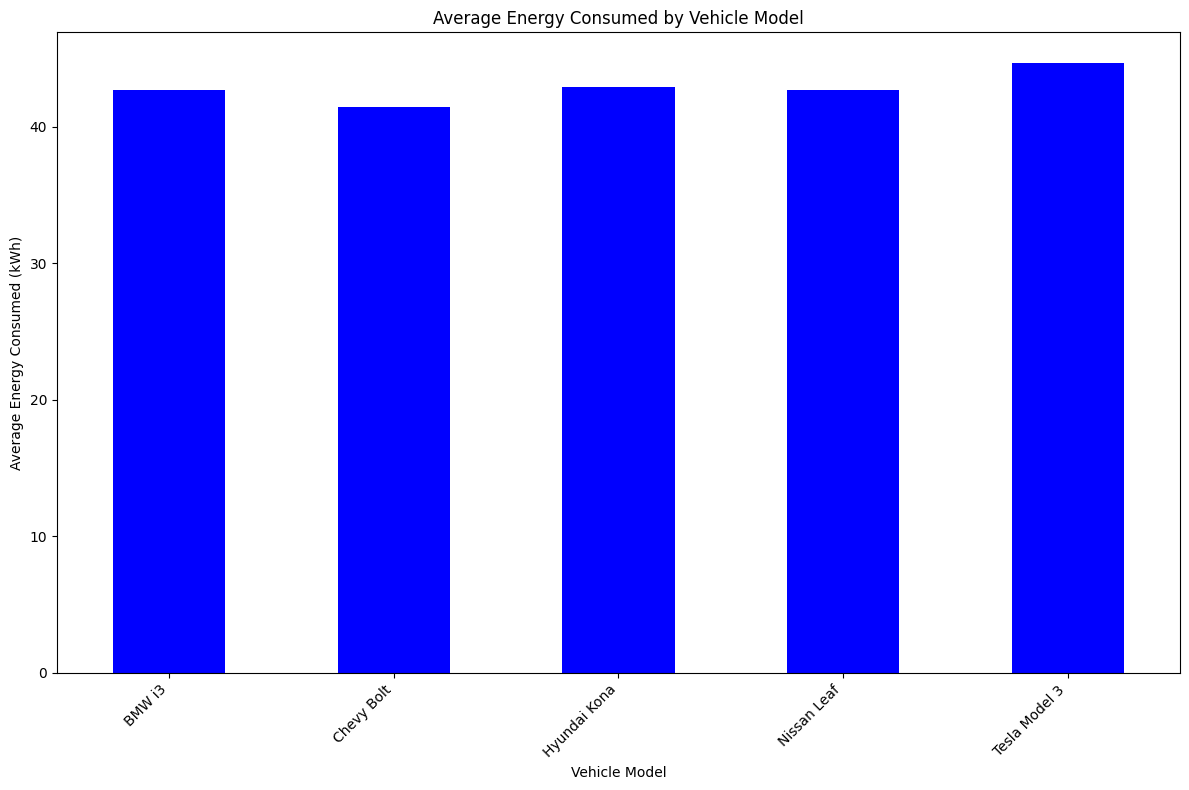

In [11]:

if 'Vehicle_Model' in df.columns and 'Energy_Consumed_(kWh)' in df.columns:
    avg_energy=df.groupby('Vehicle_Model')['Energy_Consumed_(kWh)'].mean()
    print("average wnergy consumed is : ",avg_energy)
    plt.figure(figsize=(12, 8))
    avg_energy.plot(kind='bar', color='blue')
    plt.title('Average Energy Consumed by Vehicle Model')
    plt.xlabel('Vehicle Model')
    plt.ylabel('Average Energy Consumed (kWh)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()

### 3.What is the distribution of charging duration for different charger types?

                 count      mean       std       min       25%       50%  \
Charger_Type                                                               
DC Fast Charger  369.0  2.309068  1.055446  0.140030  1.471644  2.307794   
Level 1          397.0  2.283455  1.104031  0.165394  1.338040  2.285794   
Level 2          365.0  2.318673  1.036315  0.095314  1.470670  2.346321   

                      75%       max  
Charger_Type                         
DC Fast Charger  3.176319  6.773095  
Level 1          3.043865  7.635145  
Level 2          3.196446  6.759152  


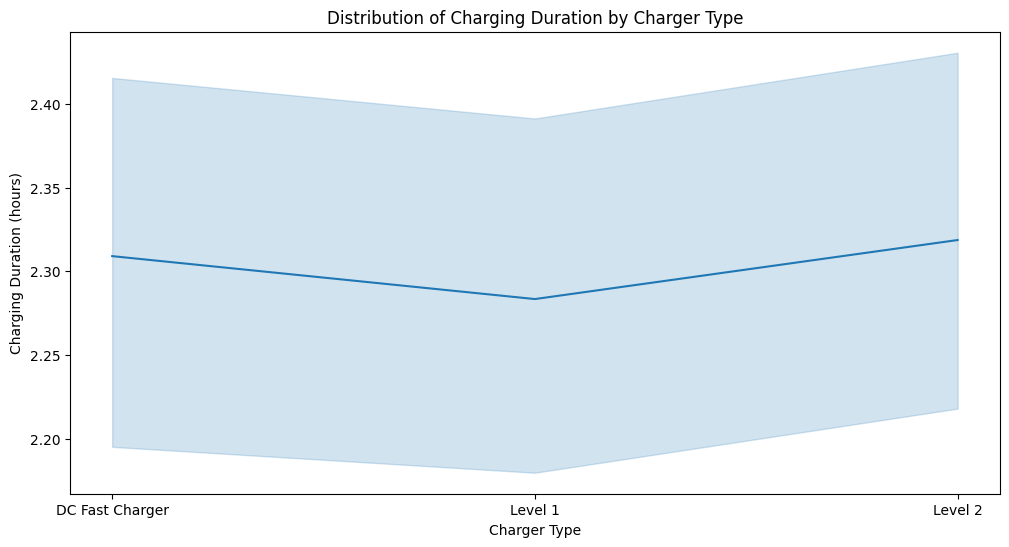

In [12]:

if 'Charger_Type' in df.columns and 'Charging_Duration_(hours)' in df.columns:
    charge=df.groupby('Charger_Type')['Charging_Duration_(hours)'].describe()
    print(charge)
plt.figure(figsize=(12,6))
sns.lineplot(x='Charger_Type',y='Charging_Duration_(hours)',data=df)
plt.title('Distribution of Charging Duration by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Charging Duration (hours)')
plt.show()

### 4.How does the average charging cost compare across different charging station locations?

Charging_Station_Location
Chicago          23.644712
Houston          21.749284
Los Angeles      22.901386
New York         22.590428
San Francisco    21.581285
Name: Charging_Cost_(USD), dtype: float64


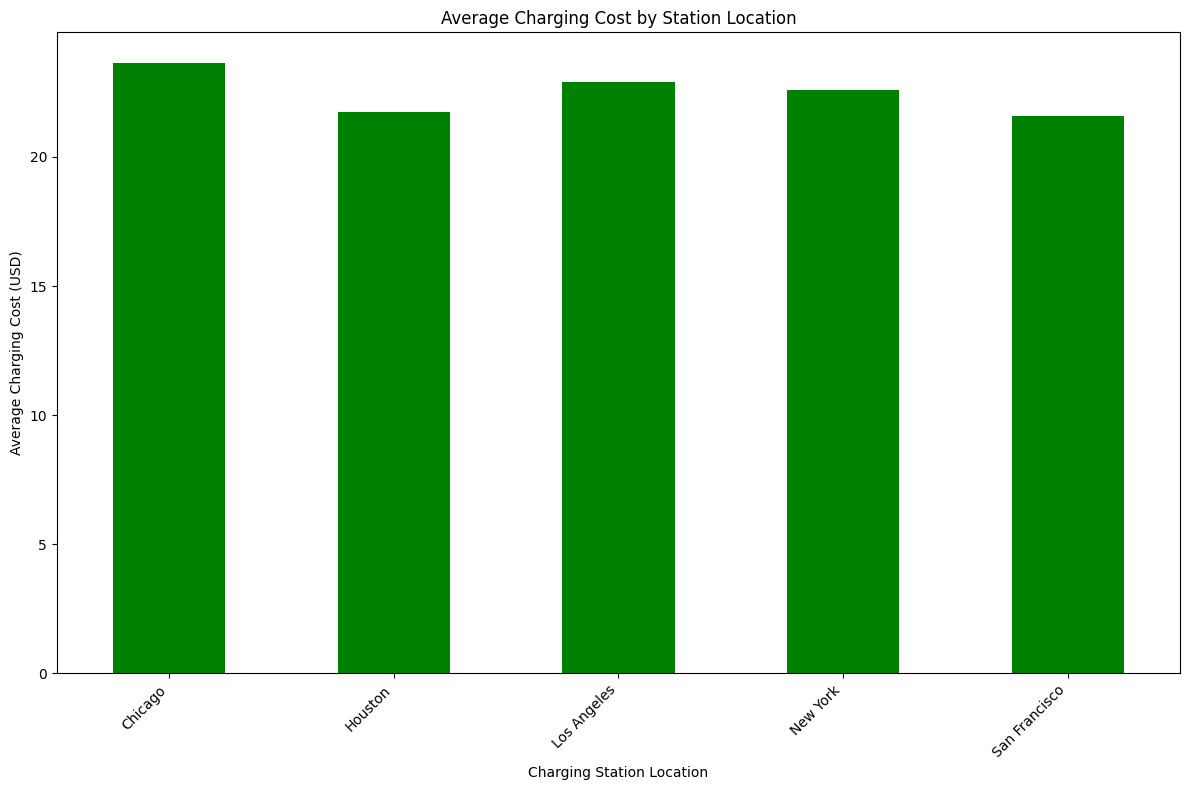

In [13]:

if 'Charging_Station_Location' in df.columns and 'Charging_Cost_(USD)' in df.columns:
    cost=df.groupby('Charging_Station_Location')['Charging_Cost_(USD)'].mean()
    print(cost)
    plt.figure(figsize=(12, 8))
    cost.plot(kind='bar', color='green')
    plt.title('Average Charging Cost by Station Location')
    plt.xlabel('Charging Station Location')
    plt.ylabel('Average Charging Cost (USD)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()

### 5.What is the relationship between the state of charge at the start and end of a charging session?

-0.035752487856434034


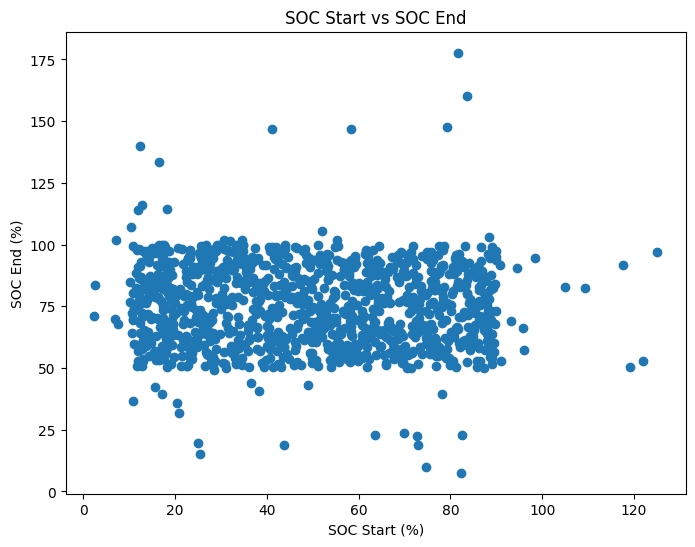

In [14]:

if 'State_of_Charge_(Start_%)' in df.columns and 'State_of_Charge_(End_%)' in df.columns:
    correlation=df['State_of_Charge_(Start_%)'].corr(df['State_of_Charge_(End_%)'])
    print(correlation)
plt.figure(figsize=(8,6))
plt.scatter(x='State_of_Charge_(Start_%)',y='State_of_Charge_(End_%)',data=df)
plt.title('SOC Start vs SOC End')
plt.xlabel('SOC Start (%)')
plt.ylabel('SOC End (%)')
plt.show()




### 6.How does the distance driven since the last charge correlate with the energy consumed during the charging session?

-0.033184250352251345


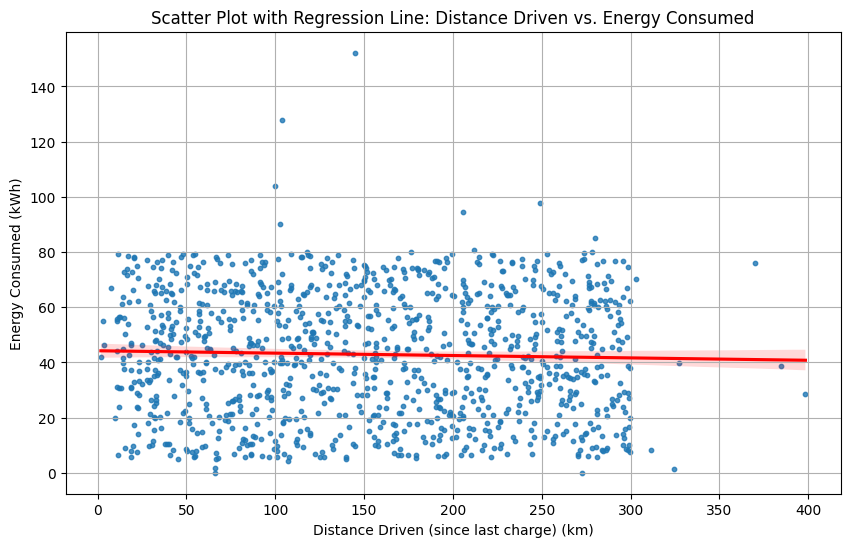

In [15]:

if 'Distance_Driven_(since_last_charge)_(km)' in df.columns and 'Energy_Consumed_(kWh)' in df.columns:
    cor = df['Distance_Driven_(since_last_charge)_(km)'].corr(df['Energy_Consumed_(kWh)'])
    print(cor)
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Distance_Driven_(since_last_charge)_(km)', y='Energy_Consumed_(kWh)', data=df, scatter_kws={'s':10}, line_kws={"color":"red"})
    plt.title('Scatter Plot with Regression Line: Distance Driven vs. Energy Consumed')
    plt.xlabel('Distance Driven (since last charge) (km)')
    plt.ylabel('Energy Consumed (kWh)')
    plt.grid(True)
    plt.show()

### 7.How does the ambient temperature affect the charging rate?

                    Temperature_(°C)  Charging_Rate_(kW)
Temperature_(°C)            1.000000            0.001323
Charging_Rate_(kW)          0.001323            1.000000


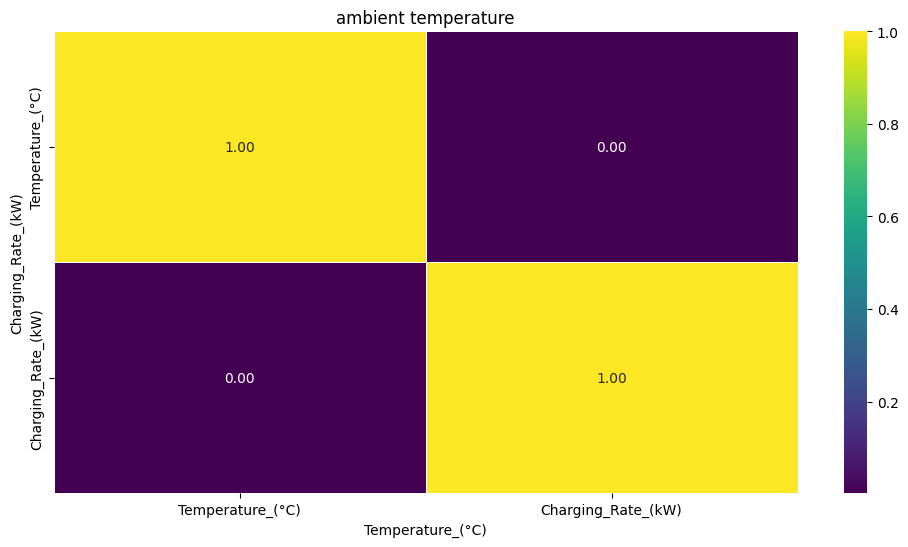

In [16]:

if 'Temperature_(°C)' in df.columns and 'Charging_Rate_(kW)' in df.columns:
    temp_rate=df[['Temperature_(°C)','Charging_Rate_(kW)']].corr()
    print(temp_rate)
plt.figure(figsize=(12,6))
sns.heatmap(temp_rate,cmap='viridis',annot=True,fmt='.2f',linewidths=0.5)
plt.title("ambient temperature")
plt.xlabel('Temperature_(°C)')
plt.ylabel('Charging_Rate_(kW)')
plt.show()

### 8.How does the vehicle age impact the average energy consumption and charging duration?

Vehicle_Age_(years)
0.000000      42.894127
0.020156      66.461054
0.088598      37.189294
0.190047      30.751504
0.288408       5.337836
0.355653      16.376371
0.361215      43.487751
0.461662      61.460675
0.674947      14.495687
0.689887      63.971967
0.739411       7.569584
0.814314      79.248546
0.845190      61.932980
0.917720      68.555460
0.925277      15.917563
1.000000      42.941033
1.038973      28.215649
1.058057      34.955124
1.087111      36.322925
1.208633       8.918419
1.413107      19.721540
1.502869      46.559654
1.535234      27.354318
1.658013      44.817191
1.719889      66.091534
1.750299       9.151234
1.755444      46.454781
1.803488      10.277608
1.809173      57.724379
1.888037      51.161822
1.896445      37.108518
1.957894       8.112448
1.969233      67.518058
2.000000      44.742954
2.007641      17.854873
2.044744      63.830609
2.061484      78.935512
2.081759      21.030520
2.124836      43.126038
2.396060       5.200113
2.537159       7.668

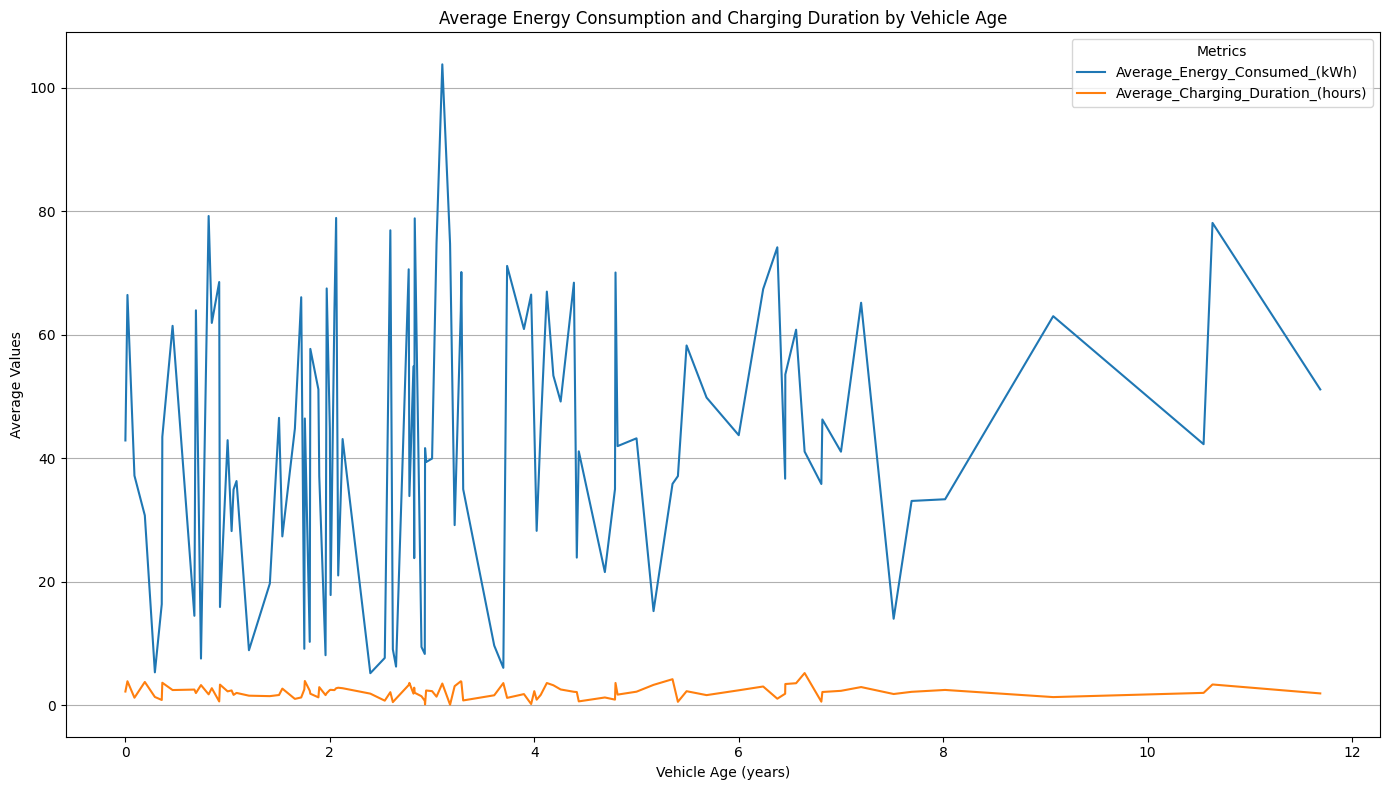

In [17]:

if 'Vehicle_Age_(years)' in df.columns and 'Energy_Consumed_(kWh)' in df.columns and 'Charging_Duration_(hours)' in df.columns:
    avg_energy_consumption=df.groupby('Vehicle_Age_(years)')['Energy_Consumed_(kWh)'].mean()
    avg_charge_duration=df.groupby('Vehicle_Age_(years)')['Charging_Duration_(hours)'].mean()
    print(avg_energy_consumption)
    print(avg_charge_duration)
    avg_data = pd.DataFrame({
        'Average_Energy_Consumed_(kWh)': avg_energy_consumption,
        'Average_Charging_Duration_(hours)': avg_charge_duration
    })
    avg_data.plot(kind='line', figsize=(14, 8))
    plt.title('Average Energy Consumption and Charging Duration by Vehicle Age')
    plt.xlabel('Vehicle Age (years)')
    plt.ylabel('Average Values')
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.grid(axis='y')
    plt.legend(title='Metrics')
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()

### 9.What are the peak hours for charging sessions, and how do they vary by day of the week?

Time_of_Day  0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  \
Day_of_Week                                          ...                       
Monday        6   7   8   7   5   7   8   7   6   6  ...   7   7   8   8   8   
Tuesday       6   7   8   8   6   6   4   6   8   8  ...   8   6   5   7   8   
Wednesday     5   7   8   8   6   8   7   6   7   8  ...   7   6   8   6   6   
Thursday      7   7   7   7   6   7   7   8   8   6  ...   6   7   8   7   6   
Friday        5   5   8   5   6   6   7   8   7   6  ...   7   8   6   8   6   
Saturday      7   6   7   8   5   7   8   6   8   7  ...   5   8   6   8   8   
Sunday        4   6   7   6   7   7   7   7   6   7  ...   6   7   6   6   7   

Time_of_Day  19  20  21  22  23  
Day_of_Week                      
Monday        7   6   7   8   6  
Tuesday       7   7   7   8   7  
Wednesday     7   7   5   6   6  
Thursday      7   7   7   6   5  
Friday        7   8   7   8   7  
Saturday      6   7   7   7   6  
Sunday 

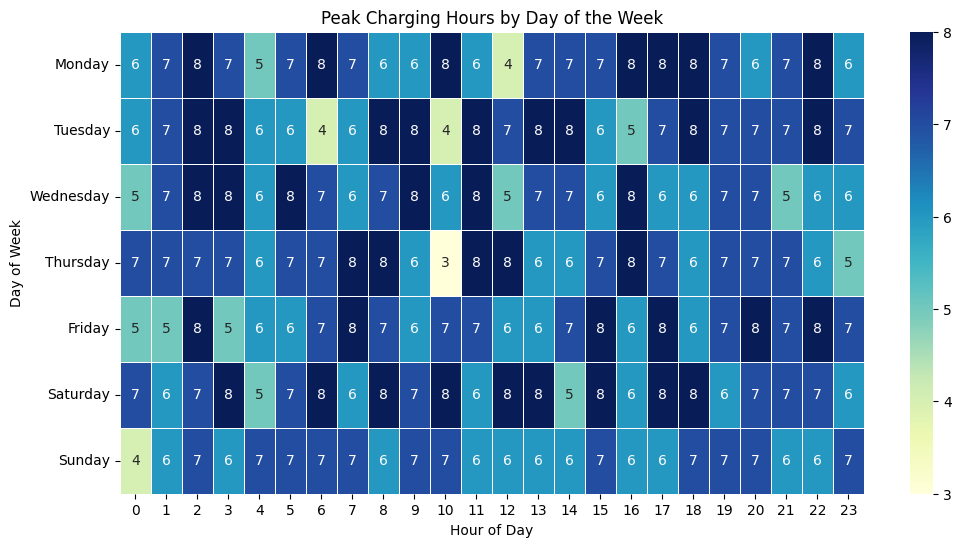

In [18]:

df['Time_of_Day']=df['Charging_Start_Time'].dt.hour
df['Day_of_Week']=df['Charging_Start_Time'].dt.day_name()
sessions_by_day = df.groupby(['Day_of_Week', 'Time_of_Day']).size().unstack(fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sessions_by_day = sessions_by_day.reindex(day_order)
print(sessions_by_day)
plt.figure(figsize=(12, 6))
sns.heatmap(sessions_by_day, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Peak Charging Hours by Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()
    
    

### 10.Which vehicle had least charging duration?

The vehicle model with the least charging duration is: Nissan Leaf
The average charging duration for this model is: 2.1816613928158275 hours


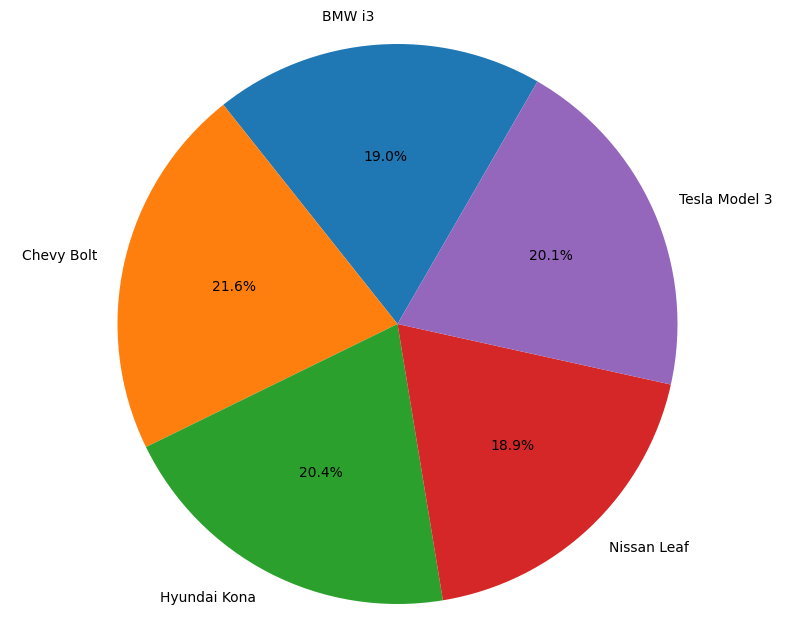

In [19]:

avg_charging_duration_by_model = df.groupby('Vehicle_Model')['Charging_Duration_(hours)'].mean()
least_charging_duration_model = avg_charging_duration_by_model.idxmin()
least_charging_duration_value = avg_charging_duration_by_model.min()
print(f"The vehicle model with the least charging duration is: {least_charging_duration_model}")
print(f"The average charging duration for this model is: {least_charging_duration_value} hours")
plt.figure(figsize=(10,8))
plt.pie(avg_charging_duration_by_model,labels=avg_charging_duration_by_model.index,autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.show()

### 11.What is the average charging duration and cost in different cities (e.g., San Francisco, Houston)?

Charging_Station_Location
Chicago          2.247642
Houston          2.302225
Los Angeles      2.262142
New York         2.238158
San Francisco    2.468331
Name: Charging_Duration_(hours), dtype: float64
Charging_Station_Location
Chicago          23.644712
Houston          21.749284
Los Angeles      22.901386
New York         22.590428
San Francisco    21.581285
Name: Charging_Cost_(USD), dtype: float64


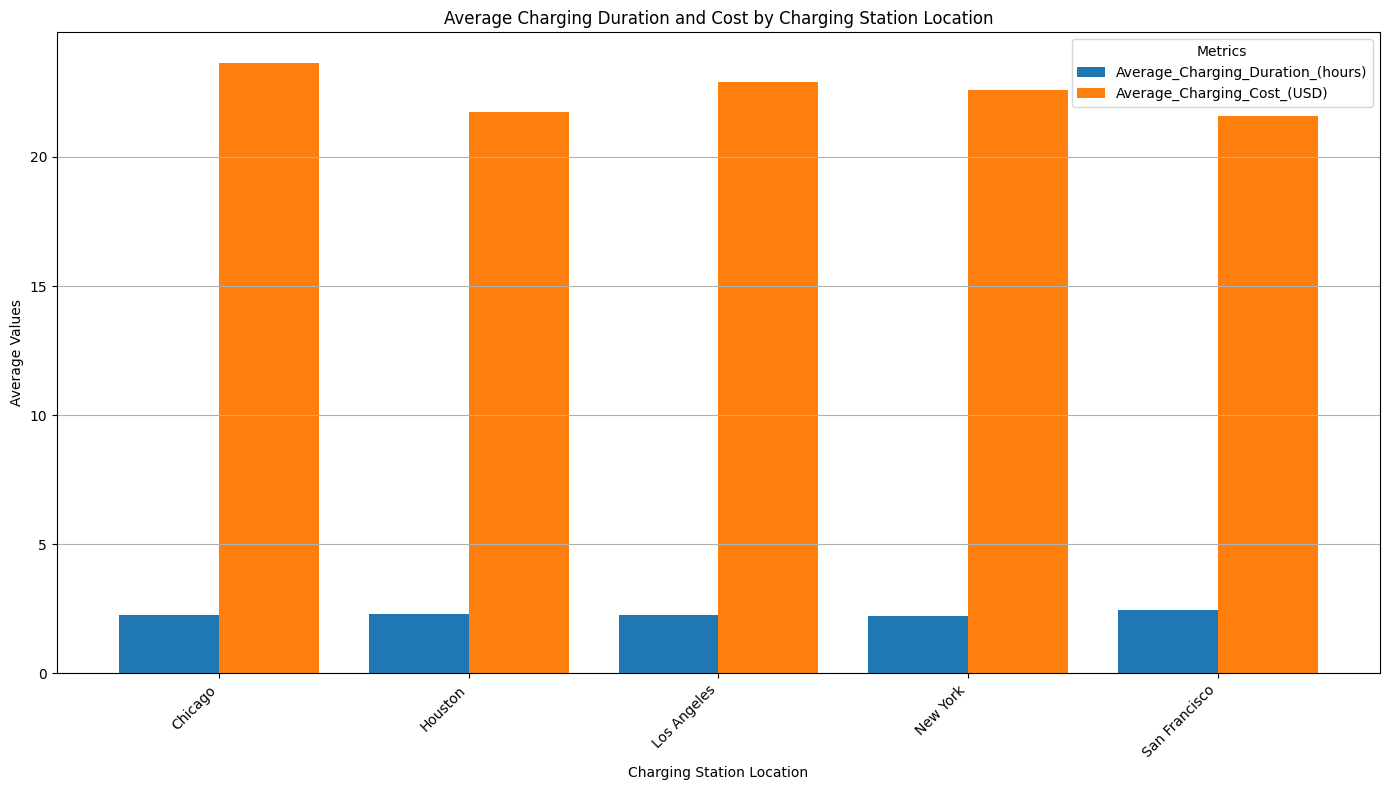

In [20]:

if 'Charging_Station_Location' in df.columns and 'Charging_Duration_(hours)' in df.columns and 'Charging_Cost_(USD)' in df.columns:
    charge_duration=df.groupby('Charging_Station_Location')['Charging_Duration_(hours)'].mean()
    charge_cost=df.groupby('Charging_Station_Location')['Charging_Cost_(USD)'].mean()
print(charge_duration)
print(charge_cost)
avg_data = pd.DataFrame({
        'Average_Charging_Duration_(hours)': charge_duration,
        'Average_Charging_Cost_(USD)': charge_cost
    })

    
avg_data.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average Charging Duration and Cost by Charging Station Location')
plt.xlabel('Charging Station Location')
plt.ylabel('Average Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to fit everything properly
plt.legend(title='Metrics')
plt.show()



### 12.which vehicle had mostly charged?

Vehicle_Model
Tesla Model 3    21.573828
Nissan Leaf      20.070734
BMW i3           19.717065
Chevy Bolt       19.363395
Hyundai Kona     19.274978
Name: count, dtype: float64


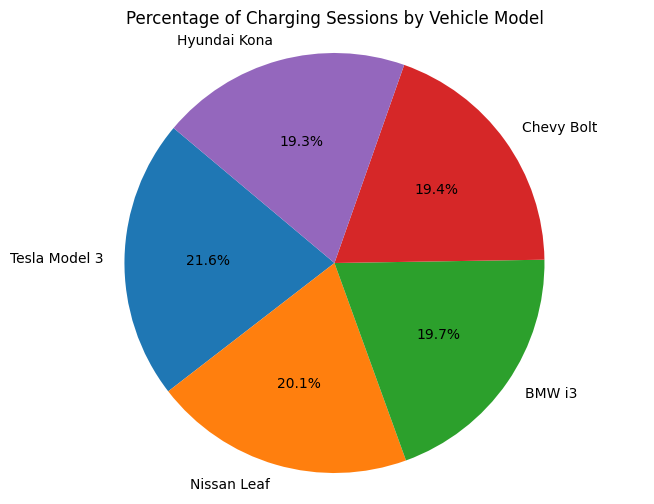

In [21]:

charging_session=df['Vehicle_Model'].value_counts()
percentage=charging_session/charging_session.sum()*100
print(percentage)
plt.figure(figsize=(8,6))
plt.pie(percentage,labels=percentage.index,autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Charging Sessions by Vehicle Model')
plt.axis('equal')
plt.show()


### 13.Which vehicle model has the highest energy efficiency (energy consumed per km driven)?


The vehicle model with the highest energy efficiency is: Hyundai Kona
The average energy efficiency for this model is: 0.43330952550273755 kWh per km


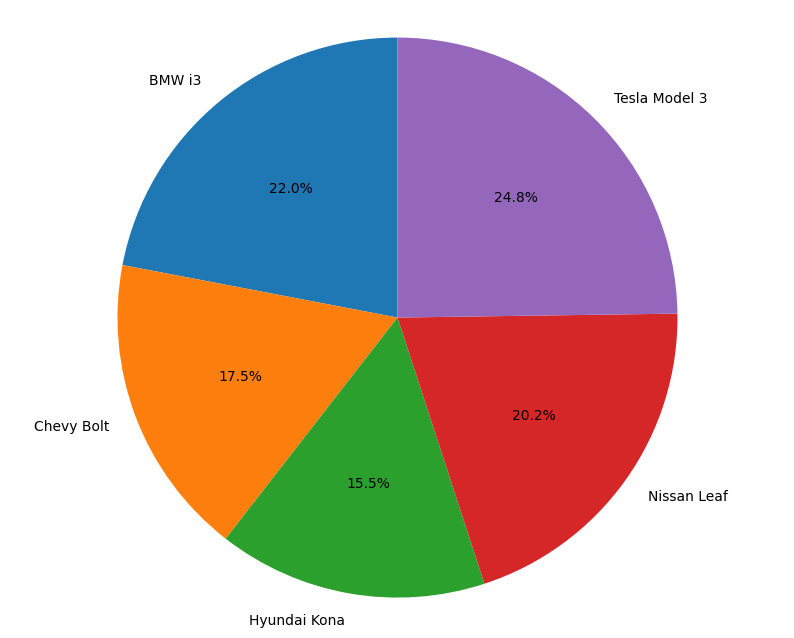

In [22]:
df['Energy_Efficiency_(kWh_per_km)']=df['Energy_Consumed_(kWh)']/df['Distance_Driven_(since_last_charge)_(km)']
avg_energy=df.groupby('Vehicle_Model')['Energy_Efficiency_(kWh_per_km)'].mean()
most_efficient_model = avg_energy.idxmin()
highest_efficiency_value = avg_energy.min()
print(f"The vehicle model with the highest energy efficiency is: {most_efficient_model}")
print(f"The average energy efficiency for this model is: {highest_efficiency_value} kWh per km")
plt.figure(figsize=(10,8))
plt.pie(avg_energy,labels=avg_energy.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


# Summary
### The analysis of the EV charging patterns dataset revealed that extreme temperatures significantly impact charging duration and energy consumption, with both metrics increasing under very high or low temperatures. Additionally, certain vehicle models were found to have notably shorter charging durations and higher energy efficiency, providing valuable insights for users in selecting efficient EV models.

### Furthermore, the study visualized the distribution of charging sessions among different vehicle models and highlighted cost variations and charging durations across various stations. This helped identify the most cost-effective and time-efficient charging locations, aiding in better decision-making for EV users.

### Lastly, the analysis examined the correlation between vehicle age and performance, showing that older vehicles tend to consume more energy and require longer charging times. This comprehensive analysis is essential for manufacturers and infrastructure planners to optimize charging strategies and enhance the overall efficiency and cost-effectiveness of electric vehicle usage.

# Conclusion
### In this EDA project, we analyzed various aspects of electric vehicle charging patterns, including energy consumption, charging duration, and costs across different vehicle models and charging stations. The insights reveal key relationships between factors like vehicle age and energy efficiency, as well as variations in charging costs and durations by location, aiding in better decision-making for EV users and infrastructure planning.